In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import comb

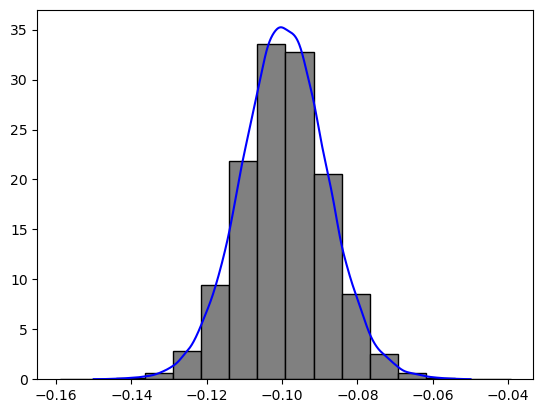

In [2]:
# Example 3.3:  Comparing Normal Means: Independent Sampling ###
n1 = 24
ybar1 = 7.8730
s1 = 0.05353
n2 = 123
ybar2 = 7.9725
s2 = 0.01409
# Independent draws from posterior ...
Nsim = 100000

sigma1_2s = 1 / ss.gamma.rvs(a=(n1 - 1) / 2, scale=1 / (((n1 - 1) * s1 ** 2) / 2), size=Nsim)
sigma2_2s = 1 / ss.gamma.rvs((n2 - 1) / 2, scale=1 / (((n2 - 1) * s2 ** 2) / 2), size=Nsim)

mu1s = ss.norm.rvs(ybar1, np.sqrt(sigma1_2s / n1), size=Nsim)
mu2s = ss.norm.rvs(ybar2, np.sqrt(sigma2_2s / n2), size=Nsim)
# Posterior inference based on empirical distribution of draws ...
# approx. posterior density curve for mu1 - mu2 (histogram and smooth)
x_train = mu1s - mu2s
x_test = np.linspace(-0.15, -0.05, 1000)
density = ss.gaussian_kde(x_train)
y = density(x_test)

fig, ax1 = plt.subplots()
ax1.hist(x_train, bins=16, color="grey", ec="k", density=True)
ax1.plot(x_test, y, c='b')
plt.show()

### **1. Variance ratio $\sigma^2_1 / \sigma^2_2$**

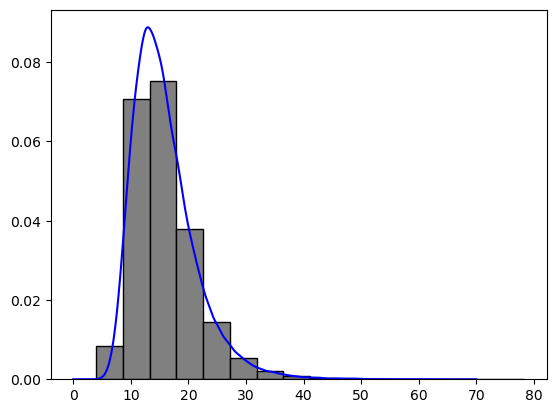

In [3]:
# Posterior inference based on empirical distribution of draws ...
# approx. posterior density curve for  sigma1_2s/sigma2_2s (histogram and smooth)
x_train = sigma1_2s/sigma2_2s

x_test = np.linspace(0, 70, 1000)
density = ss.gaussian_kde(x_train)
y = density(x_test)

fig, ax1 = plt.subplots()
ax1.hist(x_train, bins=16, color="grey", ec="k", density=True)
ax1.plot(x_test, y, c='b')
plt.show()

##### **a)**. Posterior mean

$$E(g(\theta) | y) = \frac{1}{S} \sum^{S}_{s=1} g\left(\theta^{(S)}\right)$$

In [4]:
print(f'variance ratio posterior mean is: {np.mean(x_train):.4f}')

variance ratio posterior mean is: 15.8205


##### **b)**. Montecarlo Error (MCE) of the stimated posterior mean

$$MCE = \frac{sd_g}{\sqrt{S}} \ \ \ ; where \ \  sd_g = \sqrt{sample \ var. \ of \ g\left(\theta^{(S)}\right))}$$

In [5]:
sdg = np.sqrt(np.var(x_train))
mce = sdg / np.sqrt(len(x_train))

In [6]:
print(f'the Monte Carlo error is: {mce: .4f}')

the Monte Carlo error is:  0.0176


##### **c)**. Posterior standard deviation of $\sigma^2_1 / \sigma^2_2$

In [7]:
print(f'Posterior standard deviation is: {np.std(x_train):.4f}')

Posterior standard deviation is: 5.5531


##### **c)**. Approximate 95% equal-tailed credible interval for $\sigma^2_1 / \sigma^2_2$

In [8]:
print(f'the 95% equal-tailed credival interval is: {np.quantile(x_train, [0.025, 0.975])}')

the 95% equal-tailed credival interval is: [ 8.14521486 29.41212773]


##### **d)**. Frequentist (1 − α)100% confidence interval for $\sigma^2_1 / \sigma^2_2$

$$\left[ \frac{1}{F_{\alpha/2 , n_1-1, n_2-1}} \frac{s_1^2}{s_2^2}, \ \ \ F_{\alpha/2 , n_2-1, n_1-1} \frac{s_1^2}{s_2^2} \right]$$

With:
* $\alpha = 5\%$;  $\alpha/2 = 2.5\%$
* $n_1 = 24$;  $n_1-1= 23$
* $n_2 = 123$;  $n_2 - 1 = 122$

$$\left[ \frac{1}{F_{0.025 , 23, 122}} \frac{0.05353^2}{0.01409^2}, \ \ \ F_{0.025 , 122, 23} \frac{0.05353^2}{0.01409^2} \right]$$


In [9]:
ft_1 = ss.f.ppf(1-.025, 23, 122)
ft_2 = ss.f.ppf(1-.025, 122, 23)

In [10]:
s1 = 0.05353
s2 = 0.01409
_left = (1 / ft_1) * (s1**2)/(s2**2)
_right = ft_2 * (s1**2)/(s2**2)

In [11]:
print(f'Frequentist (1 − α)100% confidence interval is: [{_left}, {_right}]')

Frequentist (1 − α)100% confidence interval is: [8.144024968159668, 29.448774274763736]


The frequentist (1 − α)100% confidence interval is similar to the 95% equal-tailed credival interval.

### **2. Deviance function**

$$D(y|\theta) = -2ln\left( f(y|\theta) \right)$$

$y = 12$ out of $n = 70$ sampled students had pets

$$
\begin{align*} 
Y|\theta \sim Bin(n, \theta) \\ \\
f(y|\theta) = \binom{n}{y} \theta^y(1-\theta)^{n -y}
\end{align*}
$$

Jeffreys' Prior
$$
\pi(\theta) \sim Beta(0.5, 0.5)
$$

#### **2a. deviance function derivation**

Thus,

$$
\begin{align*} 
D(y|\theta) &= -2ln\left[ \binom{n}{y} \theta^y(1-\theta)^{n -y} \right] \\ \\
&= -2 \left[ln\binom{n}{y} + y ln(\theta) + (n-y)ln(1-\theta) \right] \\ \\
&= -2 \left[ln\binom{70}{12} + 12 ln(\theta) + 58ln(1-\theta) \right] \\ \\
\end{align*}
$$

#### **2b. Posterior expected deviance**

$$
\begin{align*} 
E(D(y|\theta) | y) &= \frac{\int^1_0 {D(y|\theta) f(y| \theta) \pi (\theta) d\theta}}{\int_0^1 {f(y|\theta)\pi (\theta) d\theta}} \\ \\
&= \frac{\int^1_0 {D(y=12|\theta) f(y=12| \theta) \pi (\theta) d\theta}}{\int_0^1 {f(y=12|\theta)\pi (\theta) d\theta}} \\ \\
\end{align*}
$$




In [12]:
# Defining functions for perfoming the integration

def likelihood(theta, y, n):
    """
    
    """
    return theta ** y * (1 - theta) ** (n - y)

def deviance(theta, y, n):
    """
    Fucntion that computes the deviance estimated in 2a using theta, y, and n parameters
    """
    dev = -2 * (np.log(comb(n, y)) + 12 * np.log(theta) + 58 * np.log(1 - theta))
    return dev


def prior(theta):
    """
    Function that computes the prior (Beta)
    """
    return ss.beta.pdf(theta, 0.5, 0.5)

# numerator
def _num(theta, y, n):
    """
    Function used to perform the integration in the numerator
    """
    return deviance(theta, y, n) * likelihood(theta, y, n) * prior(theta)

# denominator
def _den(theta, y, n):
    """
    Function used to perform the integration in the denominator
    """
    return prior(theta) * likelihood(theta, y, n)

In [13]:
n = 70
y = 12

# performing integration over the numerator
numerator = quad(_num, 0, 1, args=(y, n))[0]
print(f'numerator: {numerator}')
denominator = quad(_den, 0, 1, args=(y, n))[0]
print(f'denominator: {denominator}')

print(f'The posterior expected deviance is : {numerator / denominator}')

numerator: 5.754593657941851e-15
denominator: 1.1199289224795875e-15
The posterior expected deviance is : 5.138356142460227


### **3. GRADUATE SECTION**

Let $N \geq 0$ and $0<\theta<1$
$$
\begin{align*} 
Y|N=n,\theta \sim Binomial(n, \theta); \ \ \ \  N \geq Y \\ \\
\end{align*}
$$

$N \geq Y$. Under the prior, let $N$ and $\theta$ be independent with densities

$$
\pi(n)\sim (0.9)^n,  \ \ \ n= 0, 1, 2, 3, ... \\ \\ 
\pi(\theta) \sim 1,  \ \ \ \ 0<\theta<1
$$

#### **3a. Posterior full conditional distribution of $\theta$**


$$
\begin{align*} 
P(\theta | Y, n) & \propto f(Y|n,\theta) \pi(n) \\ \\
& \propto \binom{n}{y} \theta^y(1-\theta)^{n-y} 0.9^{n}
\end{align*}
$$

As the proportionality is $\theta$

$$
\begin{align*} 
P(\theta | Y, n) & \propto \theta^y(1-\theta)^{n-y} 
\end{align*}
$$

The posterior full conditional distibution is given by $Beta(\alpha=y+1, \beta=n-y+1)$


#### **3b.  Negative Binomial**
Let $R= N - y$ conditional on $Y = y$ and $\theta$, the distribution of R is
negative binomial. We know that $N = R + y$  thus,

$$
\begin{align*} 
P( (R+y)| y, N) & \propto f((R+y)|n,\theta) \pi(n) \\ \\
&\propto  \binom{N}{y} \theta^y(1-\theta)^{N-y}0.9 ^{N} \\ \\ 
&\propto  \binom{R+y}{y} \theta^y(1-\theta)^{R+y-y}0.9 ^{R+y} \\ \\
&\propto  \binom{R+y}{y} \theta^y(1-\theta)^{R}0.9^{R}0.9^{y}
\end{align*}
$$
Proportionality in $\theta$

$$
\begin{align*} 
P( (R+y)| y, N) &\propto  \binom{R+y}{y}(1-\theta)^{R}0.9^{R}
\end{align*}
$$

Using combinatorial property $\binom{N}{y} = \binom{N}{N - y}$

$$
\begin{align*} 
P( (R+y)| y, N) &\propto  \binom{R+y}{R}(1-\theta)^{R}0.9^{R}) \\ \\
 &\propto  \binom{R+y}{R}(0.9-0.9\theta)^{R}  \ \ \ \ \ \ \  \ \ \ \ (1)
\end{align*}
$$

The negative binomial distribution is given by

$$
\begin{align*} 
f( R|m, \theta) = \binom{R+m-1}{R}\theta^{m}(1-\theta)^{R}  \ \ \ \ \ \ \ \ \ \  \ (2)\\ \\
\end{align*}
$$

Thus from (1) and (2) we have that, 
$$
\begin{align*} 
R+y &= R+m-1 \\
m &= y+1 \\ \\ 
1- \theta &= 0.9- 0.9\theta \\
\theta &= 0.9\theta + 0.1\\ \\
\end{align*}
$$

The distribution of $R$ conditional on $Y=y$ and $\theta$ is $NegBin(m=y+1, \theta=0.9\theta + 0.1)$

#### **3c.  Gibbs sampler**

3a. The posterior full conditional distibution is given by $Beta(\alpha=y+1, \beta=n-y+1)$ 


3b. The distribution of $R \sim NegBin(m=y+1, \theta=0.9\theta +1)$



In [14]:
y = 20
Nsim = 100000
rs = np.zeros(Nsim)
thetas = np.zeros(Nsim)
rs[0] = 100
n = rs[0] + 20
thetas[0] = ss.beta.rvs(y+1, rs[0] + 1) 
for i in range(1, Nsim):
    rs[i] = ss.nbinom.rvs(y + 1, 0.9 * thetas[i-1] + 0.1)
    thetas[i] = ss.beta.rvs(a=(y + 1), b=(rs[i] + 1))


In [15]:
N = rs + y

The posterior probability that at least half of the birds in the forest were sighted, i.e., $Prob(N \le 2Y | Y = 20).$

In [16]:
np.mean(N <= y*2)

0.93575

The posterior mean of $\theta$

In [17]:
np.mean(thetas)

0.7650235559602169

The posterior mean of $R$

In [18]:
np.mean(rs)

6.94456

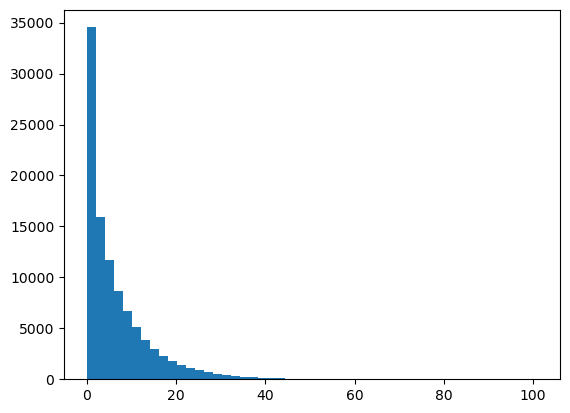

In [19]:
_ = plt.hist(rs, bins=50)

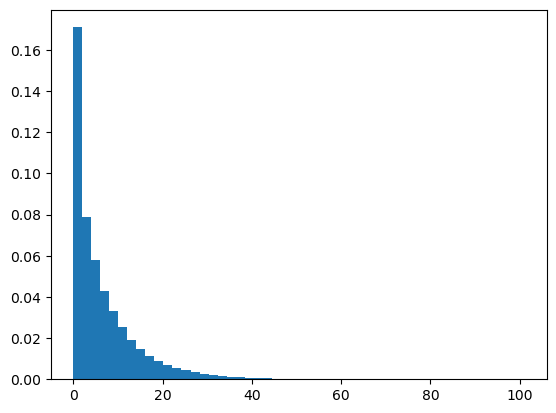

In [20]:
_ = plt.hist(rs, bins=50, density=True)